<h1>Pengaplikasian Model Linear Regression 1</h1>

Aplikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [1]:
import numpy as np

rng = np.random.RandomState(1)

x = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [5]:
# your code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Membagi data menjadi Training Set dan Test Set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Fitting Linear Regression terhadap data Training Set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediksi hasil test
y_pred = regressor.predict(X_test)

print(regressor.coef_)
print(regressor.intercept_)
regressor.score(X_test, y_test)

[ 1.5 -5.   9.  10. ]
0.5000000017891466


1.0

<h1>Pengaplikasian Model Linear Regression 2</h1>

Download [`taiwan_real_estate2.csv](https://drive.google.com/file/d/1CgU-QIxvK_r-My8I0RSYR647JQMFlCJn/view?usp=sharing)


1. Buat model regresi linear dengan response variable price (kolom `price_twd_msq`) dan explanatory variable jumlah store yang beredar di sekitar (kolom `n_convenience`). Bagaimana cara kita mengukur performa model tersebut? Apa kesimpulan yang bisa ditarik? 
2. Buat qq-plot dari hasil model tersebut. Apa insight yang bisa kita dapatkan? 
Pengumpulan dapat melalui google colab/notebook. Kata-kata penjelasan tambahan dapat ditaro di cell dalam notebook tersebut. Good luck! 
*untuk package teman-teman bebas memilih. Opsi salah satunya adalah dengan mengimport `ols` dan `qqplot` dari package `statsmodel` 
from statsmodels.formula.api import ols 
from statsmodels.api import qqplot


In [6]:
# your code here

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/sample_data/taiwan_real_estate2.csv')
df

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dist_to_mrt_m    414 non-null    float64
 1   n_convenience    414 non-null    int64  
 2   house_age_years  414 non-null    object 
 3   price_twd_msq    414 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB


In [10]:
# Mendefinisikan variabel x dan y
# Explanatory Variabel atau Independent Variabel (X) menggunakan kolom n_convenience
x = df['n_convenience'].values.reshape(-1,1)

# Response Variabel atau Dependent Variabel (Y) menggunakan kolom price_twd_msq
y = df['price_twd_msq'].values.reshape(-1,1)

In [37]:
# Membagi data menjadi Training Set dan Test Set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=400)

# Fitting Linear Regression terhadap data Training Set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediksi hasil test
y_pred = regressor.predict(X_test)

In [38]:
print(regressor.coef_)
print(regressor.intercept_)
regressor.score(X_test, y_test)

[[0.75995253]]
[8.4177885]


0.4438553059885818

dari kesimpulan modelling di atas bisa di simpulkan bahwa menggunakan Linear Regression kurang tepat karena hasil score di atas sangat kecil.

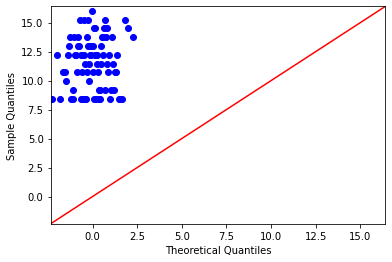

In [40]:
import statsmodels.api as sm

fig = sm.qqplot(y_pred, line='45')

dari visualisasi di atas bahwa persebaran data keluar dari garis prediksi.